In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as ps
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

## Exploration and cleaning

In [ ]:
# cancatenating target to predictors
raw_data = pd.concat([X, y], axis = 1)
raw_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


Here we do some renaming!
According to descriptions of the dataset provided in UCI page, I realized that 'day_of_week' is labeled incorrectly.
Also we rename the target variable too.

In [ ]:
raw_data = raw_data.rename(columns={'y': 'deposit', 'day_of_week': 'day_of_month'})
raw_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_month,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [ ]:
raw_data.shape

(45211, 17)

>1.1) Explore and clean the dataset. Explain your reasoning behind your
methodology, such as imputation techniques, and categorical encoding.

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           44923 non-null  object
 2   marital       45211 non-null  object
 3   education     43354 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       32191 non-null  object
 9   day_of_month  45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      8252 non-null   object
 16  deposit       45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


The dataset contains numeric and categorical variables.

In [ ]:
raw_data.describe()

,age,balance,day_of_month,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Let's check on 'previous' column first.

In [ ]:
(raw_data['previous'] == 0).mean()*100

81.73674548229414

More than 80% of this variable is zero. Meaning that the number of contacts performed before this campaign for more than 80% of clients is zero and this was their first campaign they have been contacted. We may want to drop it for the predictive model phase, but for now we keep it!

### Handling Missing Values

Let's check missing values.

In [ ]:
percentage_nulls = (raw_data.isnull().mean())*100
null = pd.DataFrame({'Number_of_NaNs': raw_data.isnull().sum(), 'Percentage_of_nulls': np.round(percentage_nulls, 2)})
null = null.sort_values(by='Percentage_of_nulls',ascending=False)
null

,Number_of_NaNs,Percentage_of_nulls
poutcome,36959,81.75
contact,13020,28.80
education,1857,4.11
job,288,0.64
month,0,0.00
previous,0,0.00
pdays,0,0.00
campaign,0,0.00
duration,0,0.00
age,0,0.00


Fisrt things first, let's just drop poutcome cause it got 80% of missing values.

In [ ]:
cleaned_data = raw_data.copy(deep=True)

In [ ]:
cleaned_data = cleaned_data.drop('poutcome', axis=1)

In [ ]:
for column in ['contact', 'education', 'job']:
  print(column)
  print(cleaned_data[column].unique(),"\n")

contact
[nan 'cellular' 'telephone'] 

education
['tertiary' 'secondary' nan 'primary'] 

job
['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student'] 



Let's handle missing values using sci-kit learn's Simple imputer. Since all missing values of dataset belong to some categorical variables, we choose 'most_frequent' strategy for imputation


In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

cleaned_data[['contact', 'education', 'job']] = imputer.fit_transform(cleaned_data[['contact', 'education', 'job']])

In [ ]:
cleaned_data.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day_of_month    0
month           0
duration        0
campaign        0
pdays           0
previous        0
deposit         0
dtype: int64

In [ ]:
data = cleaned_data.copy(deep=True)

### Encoding categorical features

Let's take a look at categorical variables.

In [ ]:
cat_df = data.select_dtypes(include='object')
cat_df.head()

,job,marital,education,default,housing,loan,contact,month,deposit
0,management,married,tertiary,no,yes,no,cellular,may,no
1,technician,single,secondary,no,yes,no,cellular,may,no
2,entrepreneur,married,secondary,no,yes,yes,cellular,may,no
3,blue-collar,married,secondary,no,yes,no,cellular,may,no
4,blue-collar,single,secondary,no,no,no,cellular,may,no


Let's observe the unique values of each categorical feature.

In [ ]:
for column in cat_df:
  print(column)
  print(cat_df[column].unique(),"\n")

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student'] 

marital
['married' 'single' 'divorced'] 

education
['tertiary' 'secondary' 'primary'] 

default
['no' 'yes'] 

housing
['yes' 'no'] 

loan
['no' 'yes'] 

contact
['cellular' 'telephone'] 

month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 

deposit
['no' 'yes'] 



Here we take a look at countplot of each categorcal feature.

First we encode yes/no variables and contact variable. contact variable has only two values so we encode this variable as well as the other ones in this part in binary style!(0 and 1)

In [ ]:
data[['default', 'housing', 'loan','deposit']] = data[['default', 'housing', 'loan', 'deposit']].replace({
    'no': 0,
    'yes': 1
})

data['contact'] = data['contact'].replace({
    'cellular': 0,
    'telephone': 1
})

'education' and 'month' are ordinal. So we encode them using sci-kit learn's OrdinalEncoder.

In [ ]:
ordinal_encoder = OrdinalEncoder()
data[['education', 'month']] = ordinal_encoder.fit_transform(data[['education', 'month']])

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_month,month,duration,campaign,pdays,previous,deposit
0,58,management,married,2.0,0,2143,1,0,0,5,8.0,261,1,-1,0,0
1,44,technician,single,1.0,0,29,1,0,0,5,8.0,151,1,-1,0,0
2,33,entrepreneur,married,1.0,0,2,1,1,0,5,8.0,76,1,-1,0,0
3,47,blue-collar,married,1.0,0,1506,1,0,0,5,8.0,92,1,-1,0,0
4,33,blue-collar,single,1.0,0,1,0,0,0,5,8.0,198,1,-1,0,0


Let's use scikit-learn's OneHotEncoder to encode remaining categorical variables.

In [ ]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
oh_encoded = one_hot_encoder.fit_transform(data[['job', 'marital']])

oh_encoded_columns = one_hot_encoder.get_feature_names_out(['job', 'marital'])
oh_encoded_df = pd.DataFrame(oh_encoded, columns=oh_encoded_columns)

data = pd.concat([data, oh_encoded_df], axis=1)
data.drop(columns=['job', 'marital'], axis=1, inplace=True)
data.head()

,age,education,default,balance,housing,loan,contact,day_of_month,month,duration,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,58,2.0,0,2143,1,0,0,5,8.0,261,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,44,1.0,0,29,1,0,0,5,8.0,151,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,33,1.0,0,2,1,1,0,5,8.0,76,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,47,1.0,0,1506,1,0,0,5,8.0,92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,33,1.0,0,1,0,0,0,5,8.0,198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  int64  
 1   education          45211 non-null  float64
 2   default            45211 non-null  int64  
 3   balance            45211 non-null  int64  
 4   housing            45211 non-null  int64  
 5   loan               45211 non-null  int64  
 6   contact            45211 non-null  int64  
 7   day_of_month       45211 non-null  int64  
 8   month              45211 non-null  float64
 9   duration           45211 non-null  int64  
 10  campaign           45211 non-null  int64  
 11  pdays              45211 non-null  int64  
 12  previous           45211 non-null  int64  
 13  deposit            45211 non-null  int64  
 14  job_admin.         45211 non-null  float64
 15  job_blue-collar    45211 non-null  float64
 16  job_entrepreneur   452

Let's unify types of all columns and convert them all to int64.

In [ ]:
data = data.astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   education          45211 non-null  int64
 2   default            45211 non-null  int64
 3   balance            45211 non-null  int64
 4   housing            45211 non-null  int64
 5   loan               45211 non-null  int64
 6   contact            45211 non-null  int64
 7   day_of_month       45211 non-null  int64
 8   month              45211 non-null  int64
 9   duration           45211 non-null  int64
 10  campaign           45211 non-null  int64
 11  pdays              45211 non-null  int64
 12  previous           45211 non-null  int64
 13  deposit            45211 non-null  int64
 14  job_admin.         45211 non-null  int64
 15  job_blue-collar    45211 non-null  int64
 16  job_entrepreneur   45211 non-null  int64
 17  job_housemai

>1.2)Explore the relation between different features in this dataset. Use
different graphs and visualizations to back up your result.

For better analysis and interpretation from further explorations using visualizations, it's better to use the dataframe with  not-encoded categoriacal features. So we use a copy of such dataframe.

In [ ]:
df = cleaned_data.copy(deep=True)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_month,month,duration,campaign,pdays,previous,deposit
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,no


### Numerical variables

First let's take another look at the descriptive statistics of the numerical features.

In [ ]:
df.describe()

,age,balance,day_of_month,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- Mean Age is approximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)
- The mean balance is aproximately 1,362. However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.
- The big difference between mean and median of features 'balance' and 'duration' is because of outliers!

Let's take a quik look at the distribution of each numerical feature.

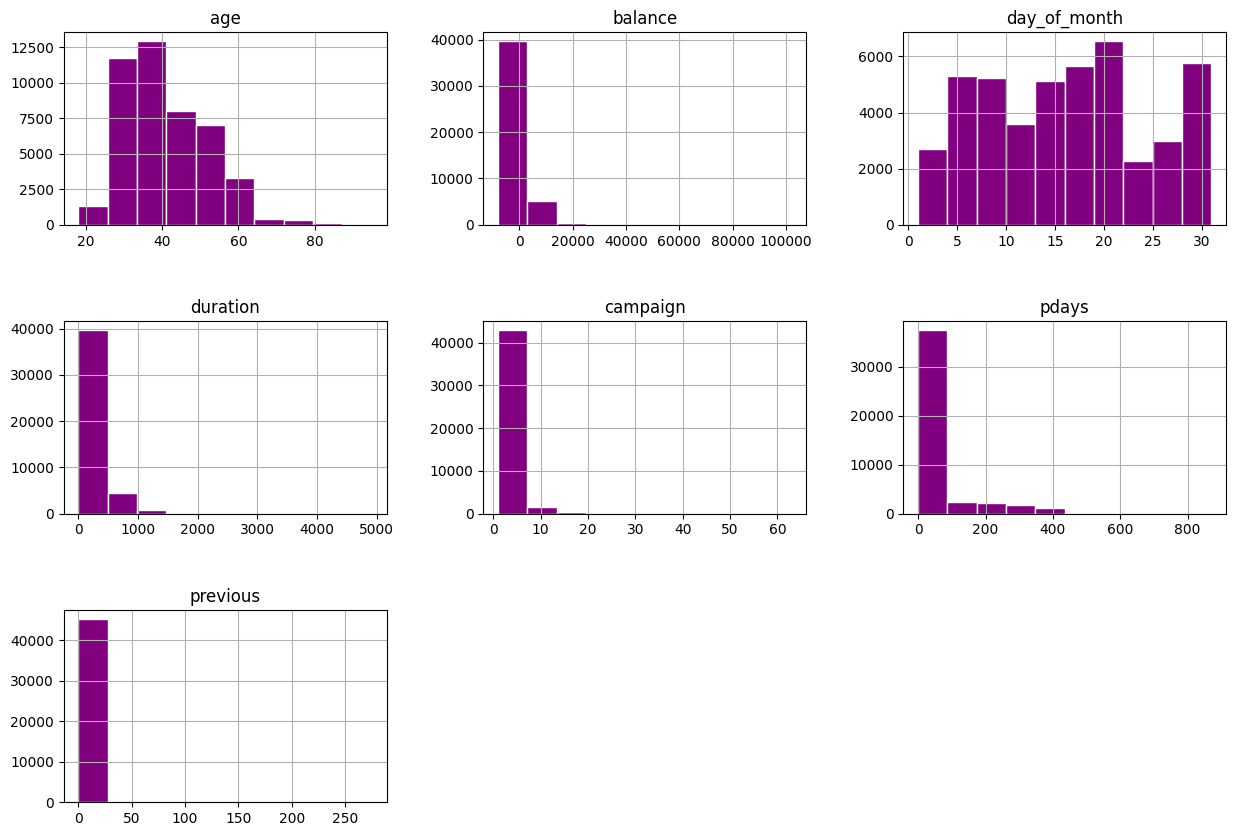

In [ ]:
df.hist(figsize=(15, 10), edgecolor='white', color='purple')
plt.subplots_adjust(hspace=0.5)

- Most of the clients lie between age of around 25 and 65.
- **About campaign**: Calling more than ten times a same person during a single marketing campaign seems excessive. And ofcourse they are outliers as it is shown in boxplots below.

**Something about 'duration'**: this attribute highly affects the output target (e.g., if duration=0 then deposit='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call deposit is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. But we will keep it for the purposes of this assignment!

And a quik look at correlation heatmap...

<Axes: >

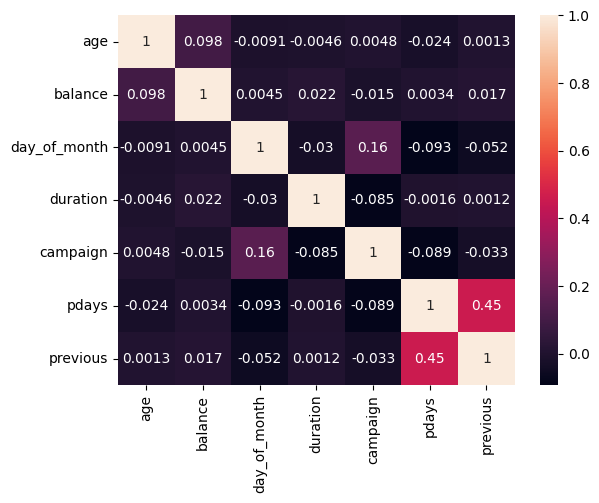

In [ ]:
sns.heatmap(df.corr(), annot=True)

Apperantly there is no linear relationship between any of the features. Thankfully, we don't have any continous target variable that we can apply a regression model to!

In [ ]:
num_cols = df.select_dtypes(include='number').columns

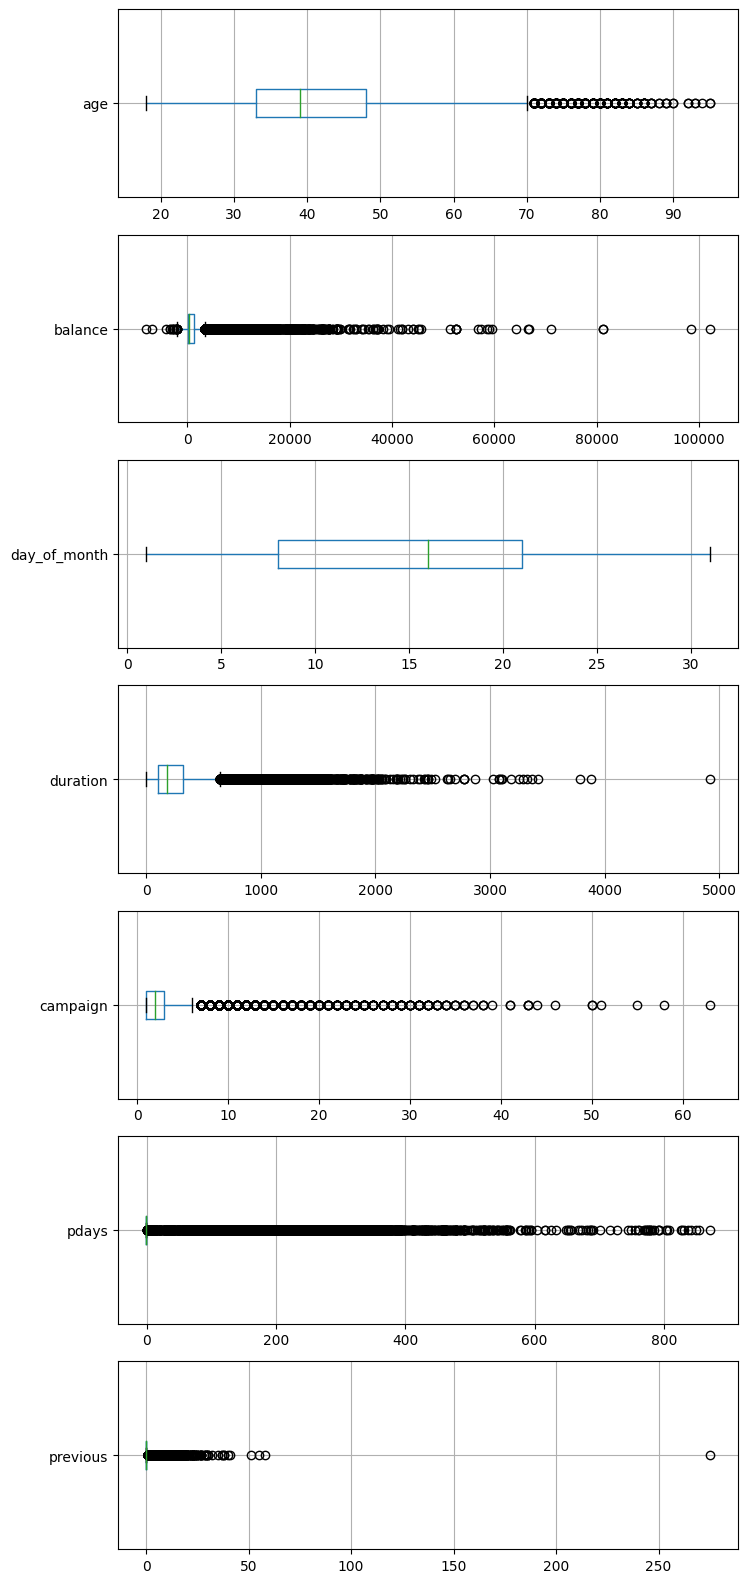

In [ ]:
fig, axes = plt.subplots(7,1,figsize=(8,20))
for i,c in enumerate(df[num_cols]):
    df[[c]].boxplot(ax=axes[i], vert=False)

Many of the features have a lot of outliers.

In the further analysis, relationship between each of these variables and the target variable is gonna be investigated, too! So let's take a look at target variable just to check the balance of it!

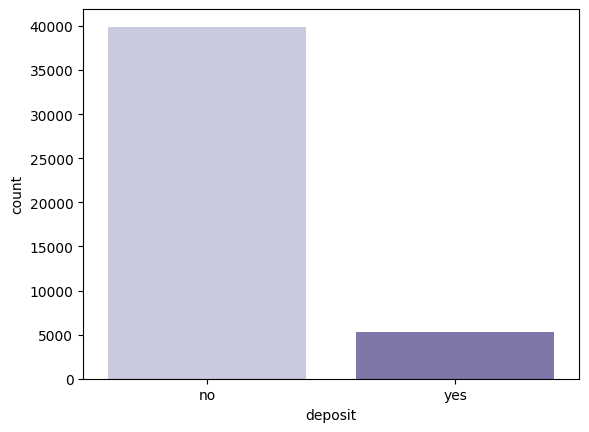

In [ ]:
# draw countplot for target
sns.countplot(data=df, x='deposit', palette='Purples')
plt.show()

So imbalanced! Most of the clients have not subscribed a term deposit.

#### Categorical Features

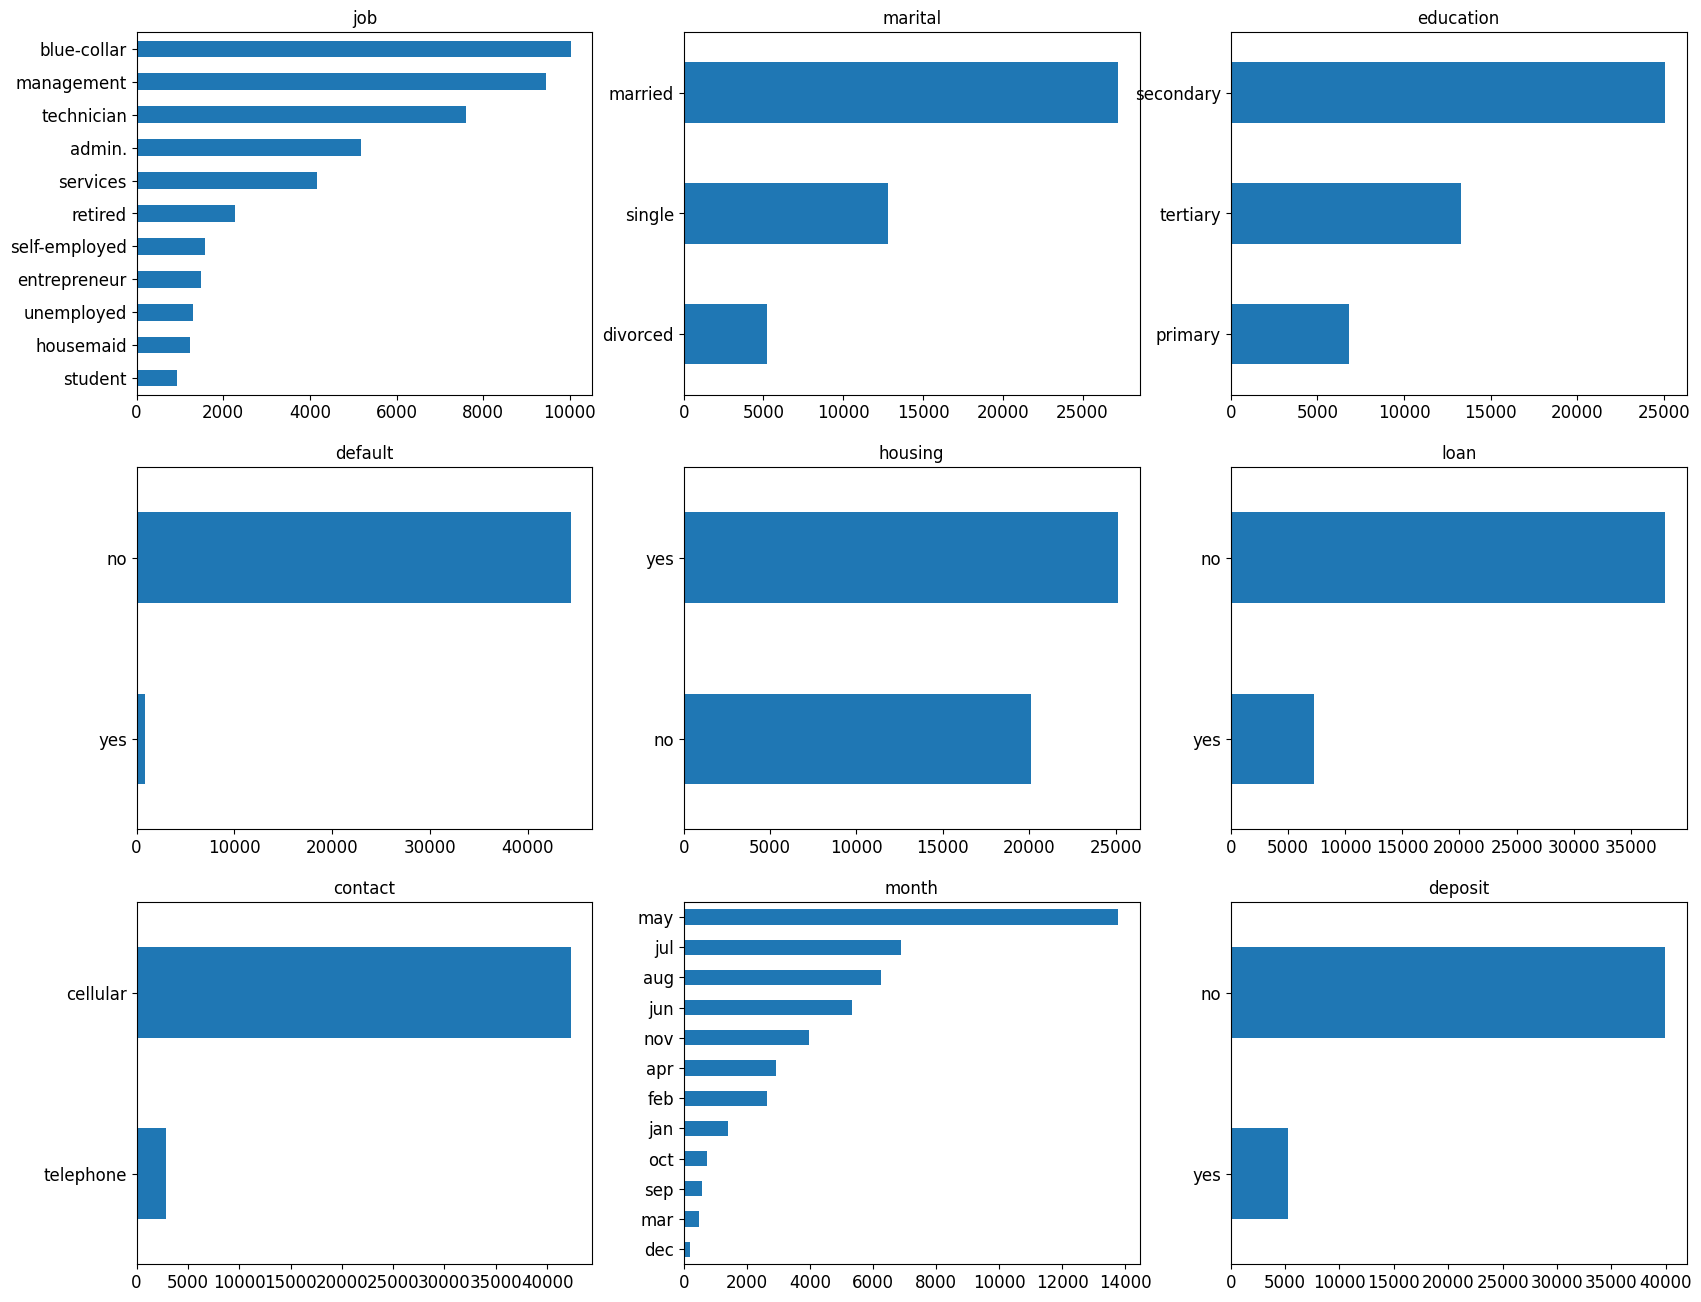

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20,16))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(cat_df):
    cat_df[c].value_counts()[::-1].plot(kind='barh',
                                          ax=axes[i],
                                          title=c,
                                          fontsize=12)

- Most of the clients have blue-collar and management jobs. Least of them are students.
- Most of the clients are married.
- Most of the clients have secondary education.
- Most clients are not defaulted in past.
- More than 50% of clients have taken housing loan.
- Not much of clients have taken personal loan.
- Major communication type is cellular.
- Most of the customers were last contacted in the month of May.

**Subscribed/Not Subscribed a term Deposit Distributions**

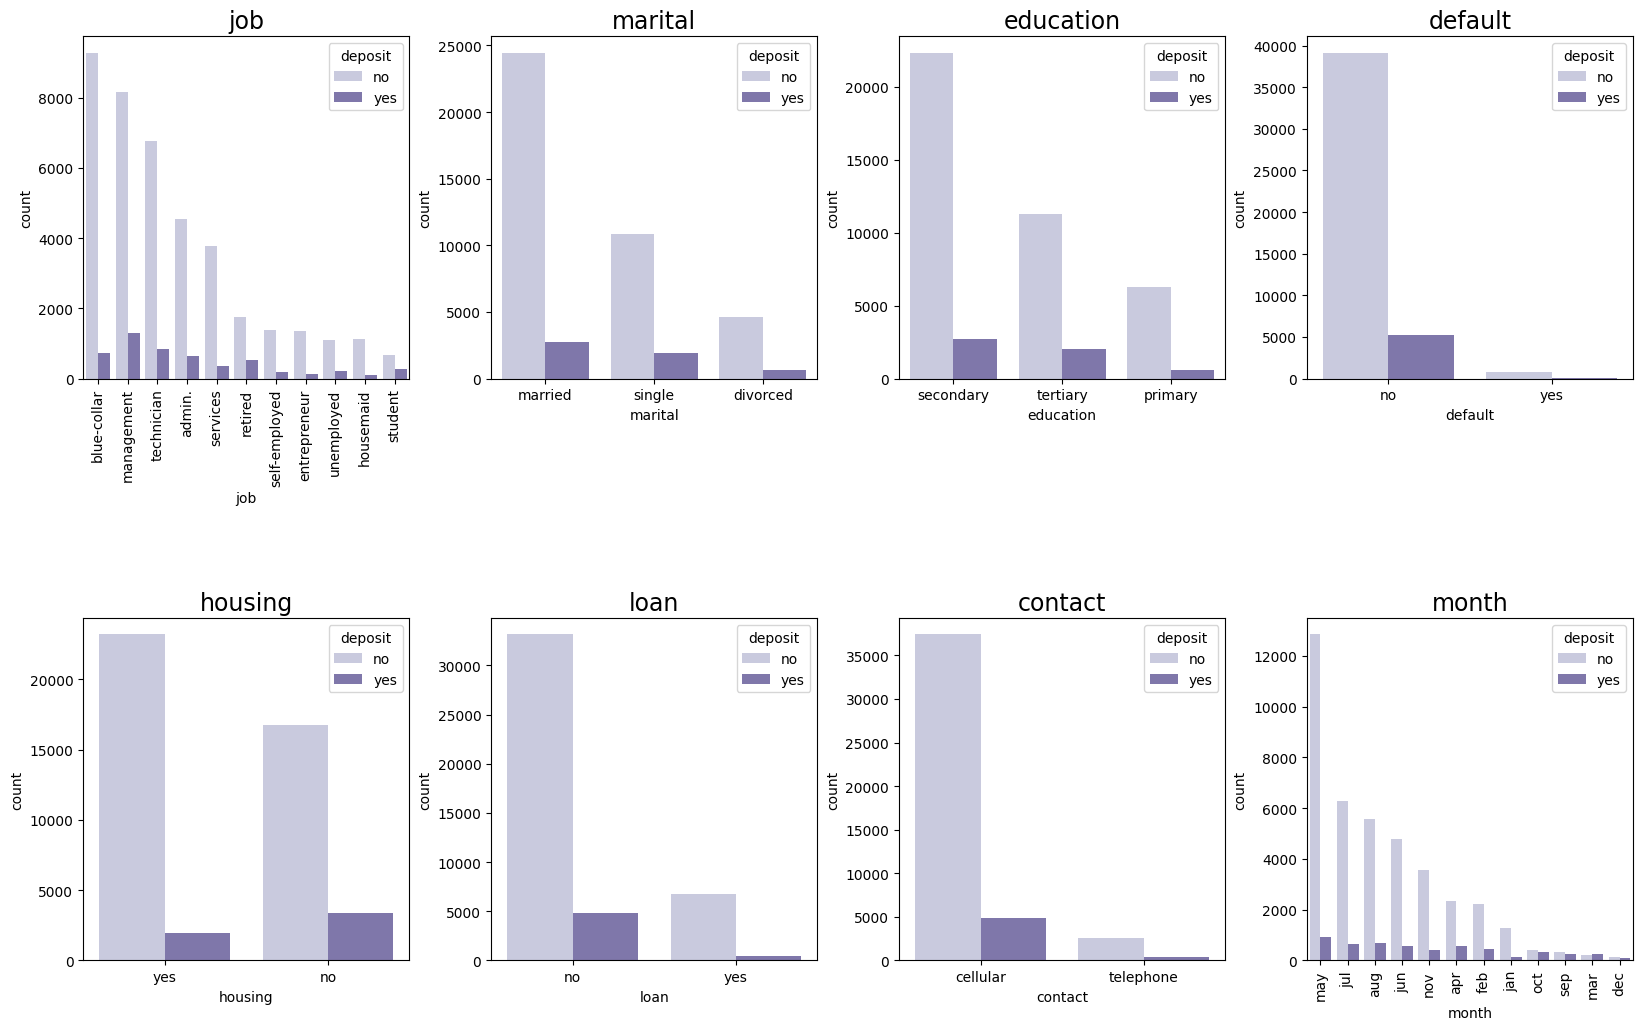

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(20,12))

ax = ax.ravel()

position = 0

for i in cat_df.drop('deposit', axis=1):

    order = cat_df[i].value_counts().index
    sns.countplot(data=cat_df, x=i, ax=ax[position], hue='deposit', palette='Purples', order=order)
    if i == 'job' or i == 'month':
      ax[position].tick_params(axis='x', labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})

    position += 1

plt.subplots_adjust(hspace=0.7, wspace=0.25)

plt.show()

- Managers have subscribed a term deposit the most!
- Because of the data being imbalanced, no more conclusions can be obtained.

#### Age vs. Marital status

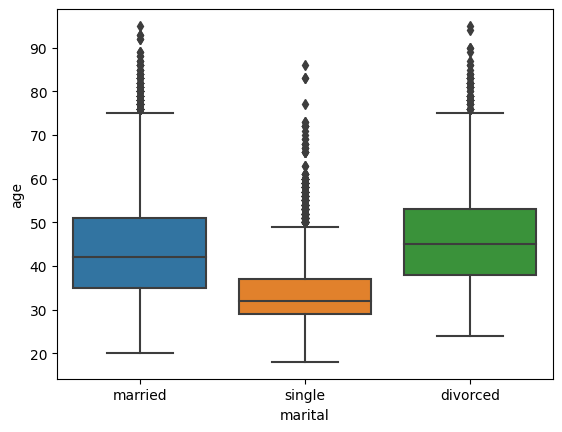

In [ ]:
sns.boxplot(data=df, x='marital', y='age')
plt.show()

Divorced clients are older than married and single ones.

#### Age vs. Job

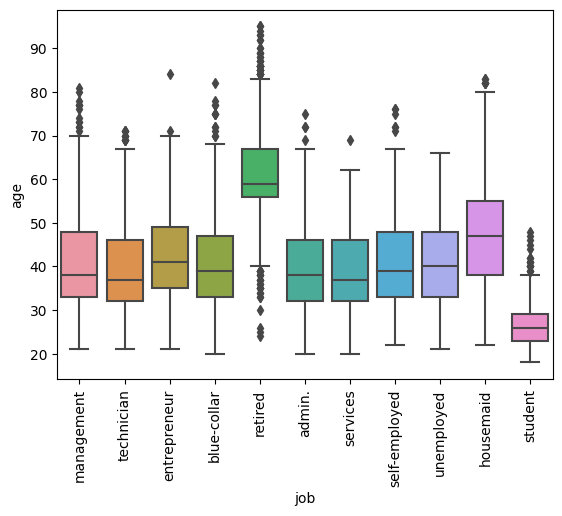

In [ ]:
sns.boxplot(data=df, x='job', y='age')
plt.xticks(rotation=90)
plt.show()

As expected, the retired are the ones who have the highest median age while student are the lowest.

#### Age vs. Deposit

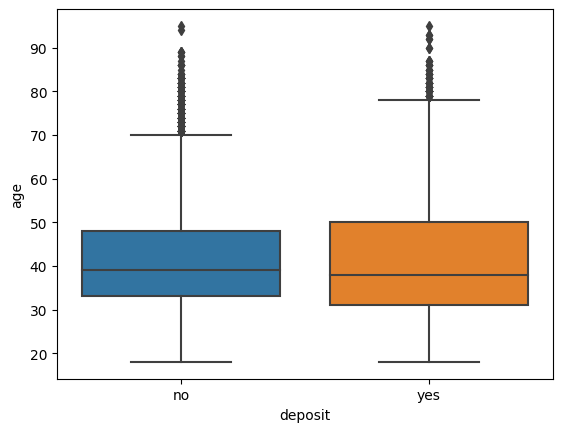

In [ ]:
sns.boxplot(data=df, x='deposit', y='age')
plt.show()

The overlapping distribution indicates that there might not be a clear distinction in terms of age between clients who subscribed and those who didn't. Meaning that age(alone) may not have effect on whether a client subscribe a term deposit or not.

#### Balance vs. Marital status

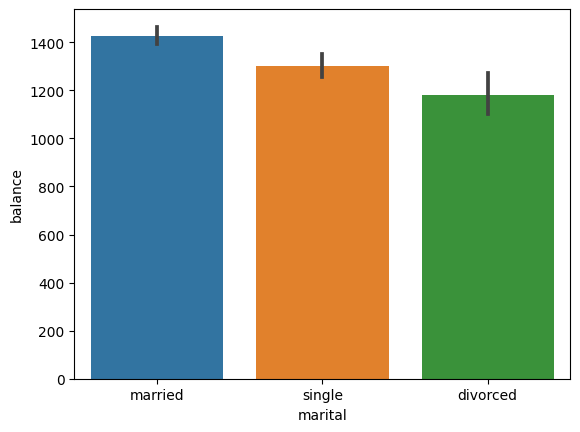

In [ ]:
sns.barplot(data=df, x='marital', y='balance')
plt.show()

#### Balance vs.Job

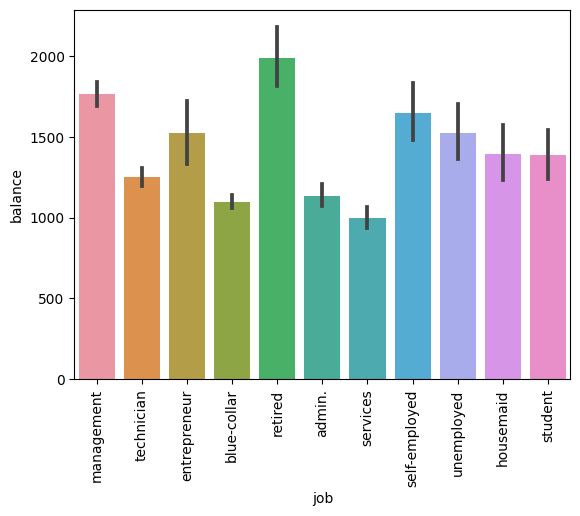

In [ ]:
sns.barplot(data=df, x='job', y='balance')
plt.xticks(rotation=90)
plt.show()

Management and Retirees are the ones who have the highest balance in their accounts.

#### Balance vs. Deposit

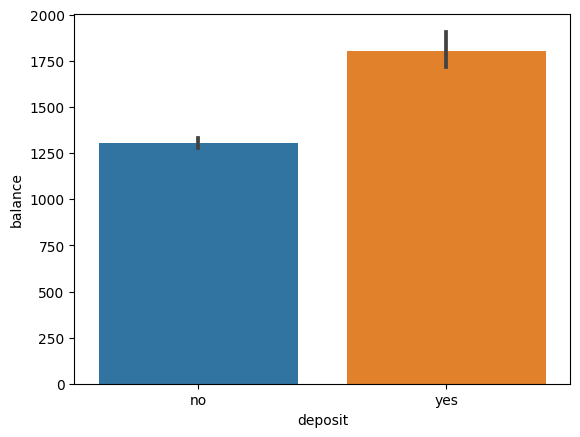

In [ ]:
sns.barplot(data=df, x='deposit', y='balance')
plt.show()

Clients with higher balance have subscribed a term deposit.

>1.3) Explore various time-related columns in this dataset and their relation
to the target column. Is there hidden information we can find? If so, how?

**Day of month**

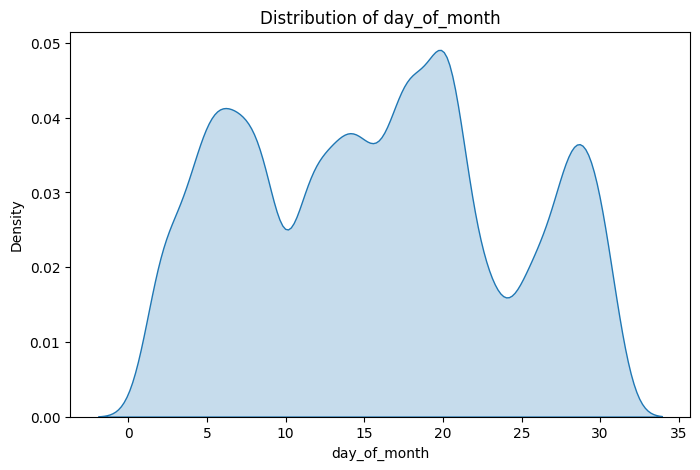

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['day_of_month'], shade=True)
plt.title('Distribution of day_of_month')
plt.show()

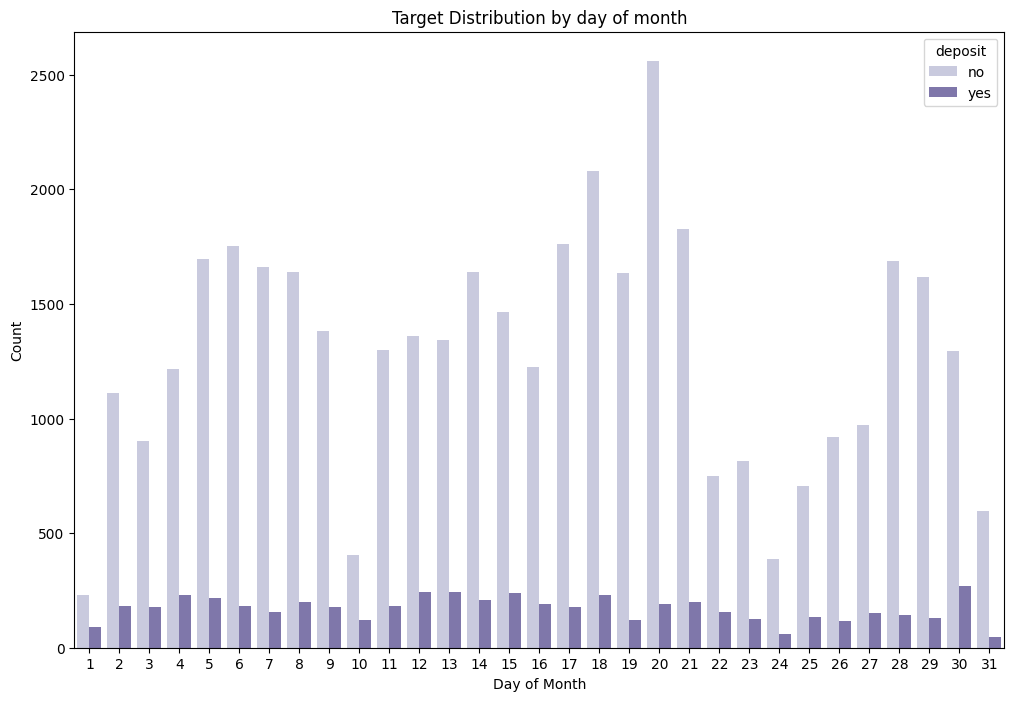

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='day_of_month', hue='deposit', palette='Purples')
plt.xlabel('Day of Month')
plt.ylabel('Count')
plt.title('Target Distribution by day of month')
plt.show()


**Month**

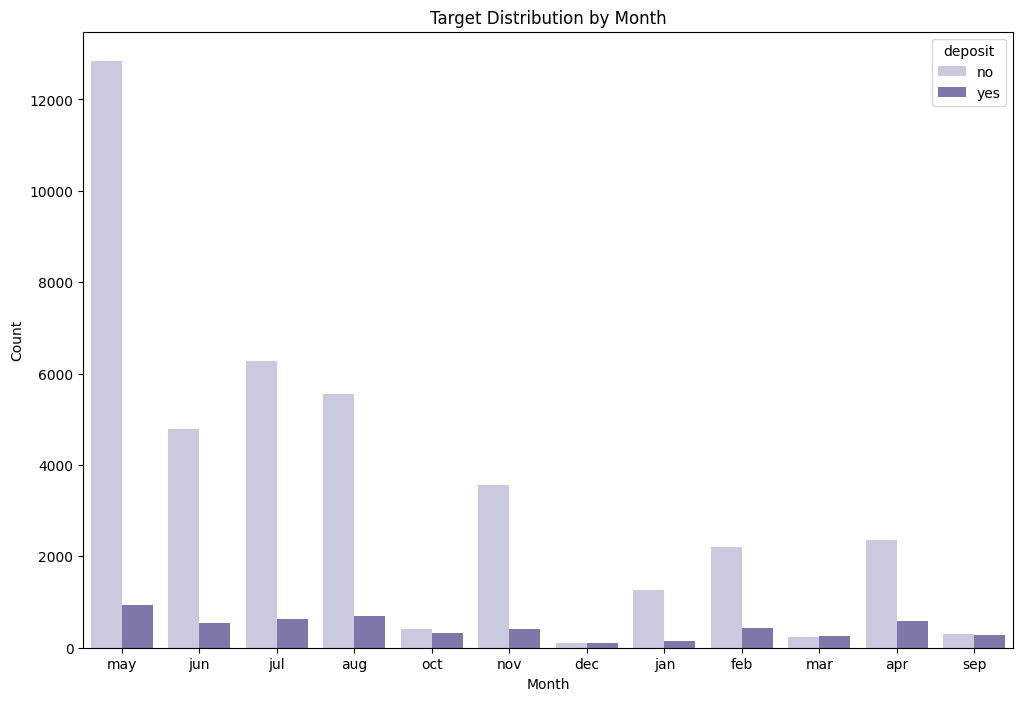

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='month', hue='deposit', palette='Purples')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Target Distribution by Month')
plt.show()


Only in March, the number of clients who subscribed was a bit more than those who didn't.

In [ ]:
may_data = df[(df['month'] == 'may') & (df['deposit'] == 'yes')]

# Group the data by day_of_month and count the number of occurrences
daily_counts = may_data['day_of_month'].value_counts().sort_index()

fig = px.line(x=daily_counts.index, y=daily_counts.values)
fig.update_layout(
    xaxis_title='Day of Month',
    yaxis_title="Number of 'deposit' = 'yes'",
    title="Number of times a client subscribed a term deposit during the month May"
)
fig.show()

**Duration**

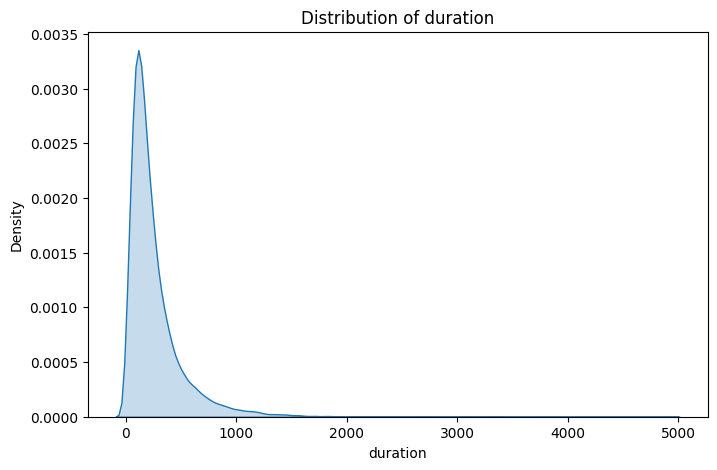

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['duration'], shade=True)
plt.title('Distribution of duration')
plt.show()

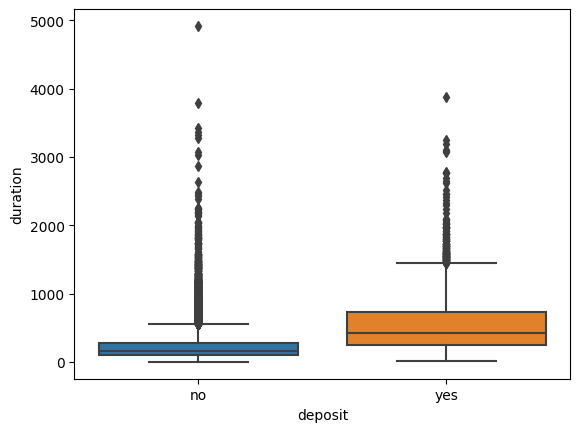

In [ ]:
sns.boxplot(data=df, x='deposit', y='duration')
plt.show()

As it was mentioned before, duration highly affects the output target (e.g., if duration=0 then deposit='no').

**pdays**

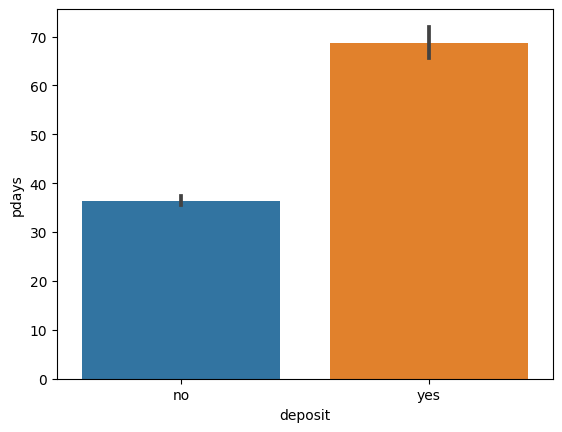

In [ ]:
sns.barplot(data=df, x='deposit', y='pdays')
plt.show()

The more days passed after the last campaign, the more deposit subscription!

>1.4) What are hypothesis tests, and how can they aid us in EDA, and
model building?

**Hypothesis testing** is a statistical method used to determine if there is enough evidence in a sample data to draw conclusions about a population. It involves formulating two competing hypotheses, the null hypothesis (H0) and the alternative hypothesis (H1), and then collecting data to assess the evidence. Hypotheses are claims, and hypothesis testing structures the problems so that we can use statistical evidence to test these claims. So we can check whether or not the claim is valid.

A p-value is a statistical measurement used to validate a hypothesis against observed data. A p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true. The lower the p-value, the greater the statistical significance of the observed difference.Note that p_value < 0.05 means: H0 rejected.

Using Hypothesis Testing, we try to interpret or draw conclusions about the population using sample data. A evaluates two mutually exclusive statements about a population to determine which statement is best supported by the sample data. **Whenever we want to make claims about the distribution of data or whether one set of results are different from another set of results in applied machine learning, we must rely on statistical hypothesis tests.**

Hypotheses help you focus your **EDA** on specific questions and goals, and provide a framework for interpreting and communicating your findings. By formulating hypotheses, you can narrow down the scope of your data exploration, and identify the most relevant variables, metrics, and methods to use.

In machine learning, hypothesis testing can be used to assess the performance of a model. For example, a healthcare provider may use hypothesis testing to compare the accuracy of two models for predicting heart disease. In this case, the null hypothesis would be that there is no difference between the two models.



In [ ]:
from scipy.stats import chi2_contingency, mannwhitneyu, kruskal, ttest_1samp

>1.5) Conduct hypothesis tests (complete with null and alternative
hypotheses) for the following:


>>1.5.1) Whether or not marital status has an effect on whether the
client has a personal loan

marital and loan are both categorical so we use the proper test which is chi-squared.**Chi-squared** tests whether two categorical variables are related to each other.

- H0: marital status **has** an effect on whether the client has a personal loan(marital and loan **dependent**)
- H1: marital status does not have an effect on whether the client has a personal loan(marital and loan **independent**)

In [ ]:
contingency_table = pd.crosstab(df['marital'], df['loan'])

stat, p_value, _, _ = chi2_contingency(contingency_table)

print("p value:%.4f" % p_value)

if p_value < 0.05:
    print("Probably depentent")
else:
    print("Probably independent")

p value:0.0000
Probably depentent


Meaning that marital status may have an effect on whether the client has a personal loan.

>>1.5.2)The effect of the previous marketing campaign on the client

We want to know if there is a significant difference in 'previous' between clients who subscribed and clients who didn't. So we wanna test if the ditribution of these two data samples are equal or not. As we have observed in the explorations above, 'previous' is not normally distributed. So we are gonna use Mann-Whitney U Test.

**The Mann-Whitney U test** is used to compare differences between two independent groups when the dependent variable is either ordinal or continuous, but not normally distributed.

- H0: the distribution of two samples are equal.

- H1: the distribution of two samples are not equal.

In [ ]:
stat, p_value = mannwhitneyu(df[df['deposit']=='no']['previous'], df[df['deposit']=='yes']['previous'])

print("p value:%.4f" % p_value)

if p_value > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

p value:0.0000
Probably different distributions


Meaning that there is a significant difference in 'previous' between clients who subscribed and clients who didn't. And the previous marketing campaign has effect on the client.

>>1.5.3) If the type of job has an effect on credit default.

We use chi-squared again.

- H0: the type of job **has** an effect on credit default(job and default **dependent**)
- H1: the type of job does **not have** an effect on credit default(job and default **independent**)

In [ ]:
contingency_table = pd.crosstab(df['job'], df['default'])

stat, p_value, _, _ = chi2_contingency(contingency_table)

print("p value:%.4f" % p_value)

if p_value < 0.05:
    print("Probably depentent")
else:
    print("Probably independent")

p value:0.0000
Probably depentent


Meaning the type of job may have an effect on credit default.

>1.6) Design 2 more hypothesis tests to further explore the dataset.

**i)The effect of education on the client.**

Using chi-squared test...

-  H0: Education **has** an effect on client(education and  deposit are **dependent**)

- H1: Education does **not have** an effect on client(education and  deposit are **independent**)

In [ ]:
contingency_table = pd.crosstab(df['education'], df['deposit'])

stat, p_value, _, _ = chi2_contingency(contingency_table)

print("p value:%.4f" % p_value)

if p_value < 0.05:
    print("Probably depentent")
else:
    print("Probably independent")

p value:0.0000
Probably depentent


Meaning that education may have effect on whether the client subscribe a term deposit or not.

**ii)The effect of the type of the job on balance.**

We wanna know if there is significant differences in balance across different types of job. So we have more than 2 samples that we wanna test if the distribution of them is equal or not. Also 'balance' is not normally distributed so the proper test is the Kruskal-Wallis H test.

**The Kruskal-Wallis H test** (sometimes also called the "one-way ANOVA on ranks") is a rank-based nonparametric test that can be used to determine if there are statistically significant differences between two or more groups of an independent variable on a continuous or ordinal dependent variable. It is considered the nonparametric alternative to the one-way ANOVA, and an extension of the Mann-Whitney U test to allow the comparison of more than two independent groups.

In [ ]:
jobs = []
for job in df['job'].unique():
    jobs.append(df[df['job'] == job]['balance'])

_, p_value = kruskal(*jobs)

print("p value:%.4f" % p_value)

if p_value < 0.05:
    print('There are significant differences in balance across different types of job.')
else:
    print('There may not be significant differences in balance across different types of job')

p value:0.0000
There are significant differences in balance across different types of job.


>1.7) What are t-tests, and what are the implications of test results? Conduct
one sample t-test on the dataset and explain your results.

A **t-test** is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

The **one-sample t-test** is a statistical hypothesis test used to determine whether an unknown population mean is different from a specific value.

Here we conduct one-samlpe t-test on duration to test if the mean duration of contacts is significantly different from a certain value, let's say 300 seconds.

- H0: The mean duration is 300(s).
- H1: The mean duration is not 300(s).

In [ ]:
# Specify the null hypothesis value
mu_0 = 260 # four minutes

t_statistic, p_value = ttest_1samp(df['duration'], mu_0)

print("p value:%.4f" % p_value)

if p_value < 0.05:
    print('There is significant difference between mean duration and mu_0.')
else:
    print('There is NOT significant difference between mean duration and mu_0.')


p value:0.1294
There is NOT significant difference between mean duration and mu_0.


Meaning that mean duration is around 260 seconds. Which is true cause it is 258 seconds!

>1.8) What are chi-square tests, and what can they be used for? Conduct
two tests on the dataset and explain your results.

**Chi-square** tests are statistical tests used to determine whether there is a significant association between two categorical variables in a population.

The chi-square test compares the observed frequencies of different categories in a dataset with the frequencies that would be expected if there were no association between the variables. The test calculates a test statistic called chi-square (χ²), which measures the difference between the observed and expected frequencies.

Three chi-squared tests have been conducted on the dataset in sections: 1.5.1, 1.5.3 and 1.6.